In [93]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [94]:
if not os.path.isfile('train.csv'):
    !wget https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv

if not os.path.isfile('test.csv'):
    !wget https://www.dropbox.com/s/0kzeu3azlpfn2v3/test.csv

In [95]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [96]:
# Remove as colunas de acordo com a Lei 

train.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)
test.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)
train['TARGET'] = train['TARGET'].astype(np.int64)

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92106 entries, 0 to 92105
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   TEMPOCPF                      92106 non-null  int64
 1   DISTCENTROCIDADE              92106 non-null  int64
 2   DISTZONARISCO                 92106 non-null  int64
 3   QTDENDERECO                   92106 non-null  int64
 4   QTDEMAIL                      92106 non-null  int64
 5   QTDCELULAR                    92106 non-null  int64
 6   CELULARPROCON                 92106 non-null  int64
 7   QTDFONEFIXO                   92106 non-null  int64
 8   TELFIXOPROCON                 92106 non-null  int64
 9   INDICEEMPREGO                 92106 non-null  int64
 10  PORTEEMPREGADOR               92106 non-null  int64
 11  SOCIOEMPRESA                  92106 non-null  int64
 12  FUNCIONARIOPUBLICO            92106 non-null  int64
 13  SEGMENTACAO                   9

In [98]:
# Transforma os valores negativos nas colunas para NaN
train[train < 0] = np.nan

In [99]:
train.describe()

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET
count,89174.000000,71439.000000,71439.000000,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,...,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,15176.000000,31960.000000,8604.000000,92106.000000
mean,15.708536,4033.569703,79226.773107,1.381793,0.342304,0.962261,0.002355,1.448876,0.010937,1.501304,...,1.060163,1.575759,0.723349,0.230913,0.003642,0.040545,2.846863,4.268867,4.855532,0.095629
std,7.988884,4823.507383,140963.157129,1.273494,0.579046,1.185530,0.048467,1.490207,0.104006,2.155579,...,2.107578,3.049371,2.056418,1.035539,0.060238,0.197234,3.188841,4.184804,4.377425,0.294083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,9.000000,486.000000,480.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,15.000000,2900.000000,3166.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000
75%,24.000000,5480.500000,129576.500000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000,8.000000,0.000000
max,27.000000,49716.000000,842292.000000,48.000000,8.000000,42.000000,1.000000,110.000000,1.000000,6.000000,...,9.000000,10.000000,10.000000,10.000000,1.000000,1.000000,18.000000,17.000000,23.000000,1.000000


In [100]:
train.head(5)

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET
0,11.0,3338.0,166753.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1
1,19.0,5792.0,4820.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0
2,26.0,1550.0,502.0,1.0,0.0,2.0,0.0,1.0,0.0,4.0,...,4.0,2.0,0.0,0.0,0.0,0.0,NaN,4.0,NaN,0
3,18.0,0.0,535010.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,7.0,0.0,1.0,0.0,0.0,NaN,2.0,7.0,0
4,20.0,0.0,2528.0,3.0,0.0,1.0,0.0,3.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,15.0,0


In [101]:
# Método utilizado para calcular a porcentagem de valores nulos em todas as colunas do dataframe.
train.isna().sum() / len(train)

TEMPOCPF                        0.031833
DISTCENTROCIDADE                0.224383
DISTZONARISCO                   0.224383
QTDENDERECO                     0.013235
QTDEMAIL                        0.013235
QTDCELULAR                      0.013235
CELULARPROCON                   0.013235
QTDFONEFIXO                     0.013235
TELFIXOPROCON                   0.013235
INDICEEMPREGO                   0.013235
PORTEEMPREGADOR                 0.013235
SOCIOEMPRESA                    0.013235
FUNCIONARIOPUBLICO              0.013235
SEGMENTACAO                     0.013235
SEGMENTACAOCOBRANCA             0.013235
SEGMENTACAOECOM                 0.013235
SEGMENTACAOFIN                  0.013235
SEGMENTACAOTELECOM              0.013235
QTDPESSOASCASA                  0.620796
MENORRENDACASA                  0.620796
MAIORRENDACASA                  0.620796
SOMARENDACASA                   0.620796
MEDIARENDACASA                  0.620796
MAIORIDADECASA                  0.620904
MENORIDADECASA  

In [102]:
# Menor e maior valor de cada coluna / % de valores nulos / Correlação das colunas com o Target
target = train["TARGET"]

data = {
    "names":[],
    "min": [],
    "max": [],
    "%null": [],
    "correlation": [],
}
for (columnName, columnData) in train.iteritems():
    data['names'].append(columnName)
    values = list(filter(lambda a: not np.isnan(a) ,columnData))
    nanvalues = len(list(filter(np.isnan ,columnData)))
    data['min'].append(min(values) if len(values) > 0 else np.nan)
    data['max'].append(max(values) if len(values) > 0 else np.nan)
    data['%null'].append(nanvalues/len(columnData))
    data["correlation"].append(abs(round(train[columnName].corr(target)*100,2)))

infoColumns = pd.DataFrame.from_dict(data)
infoColumns.sort_values('correlation',inplace=True, ascending=False)
infoColumns.to_csv("infoColumns.csv", index = False)

# Análise de correlação

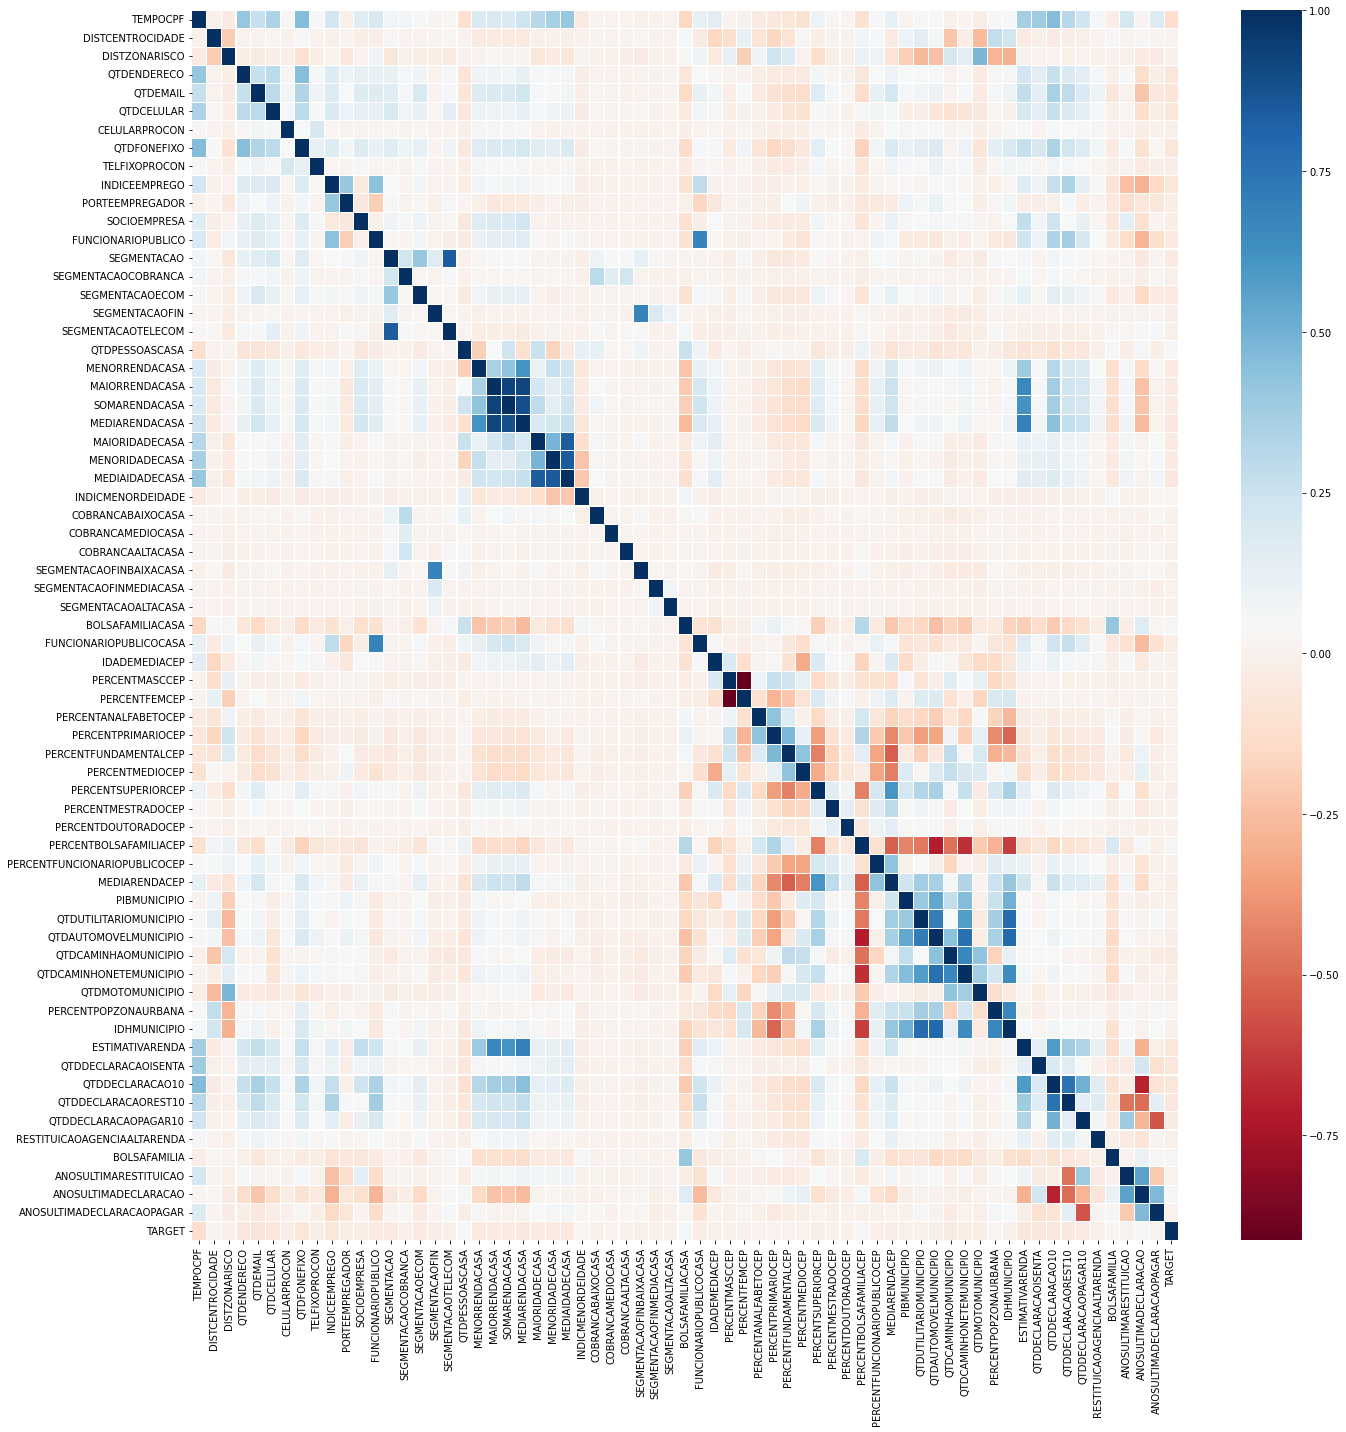

In [103]:
correlacao = train.corr()
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlacao, xticklabels=correlacao.columns,
            yticklabels=correlacao.columns, linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()
plt.show()

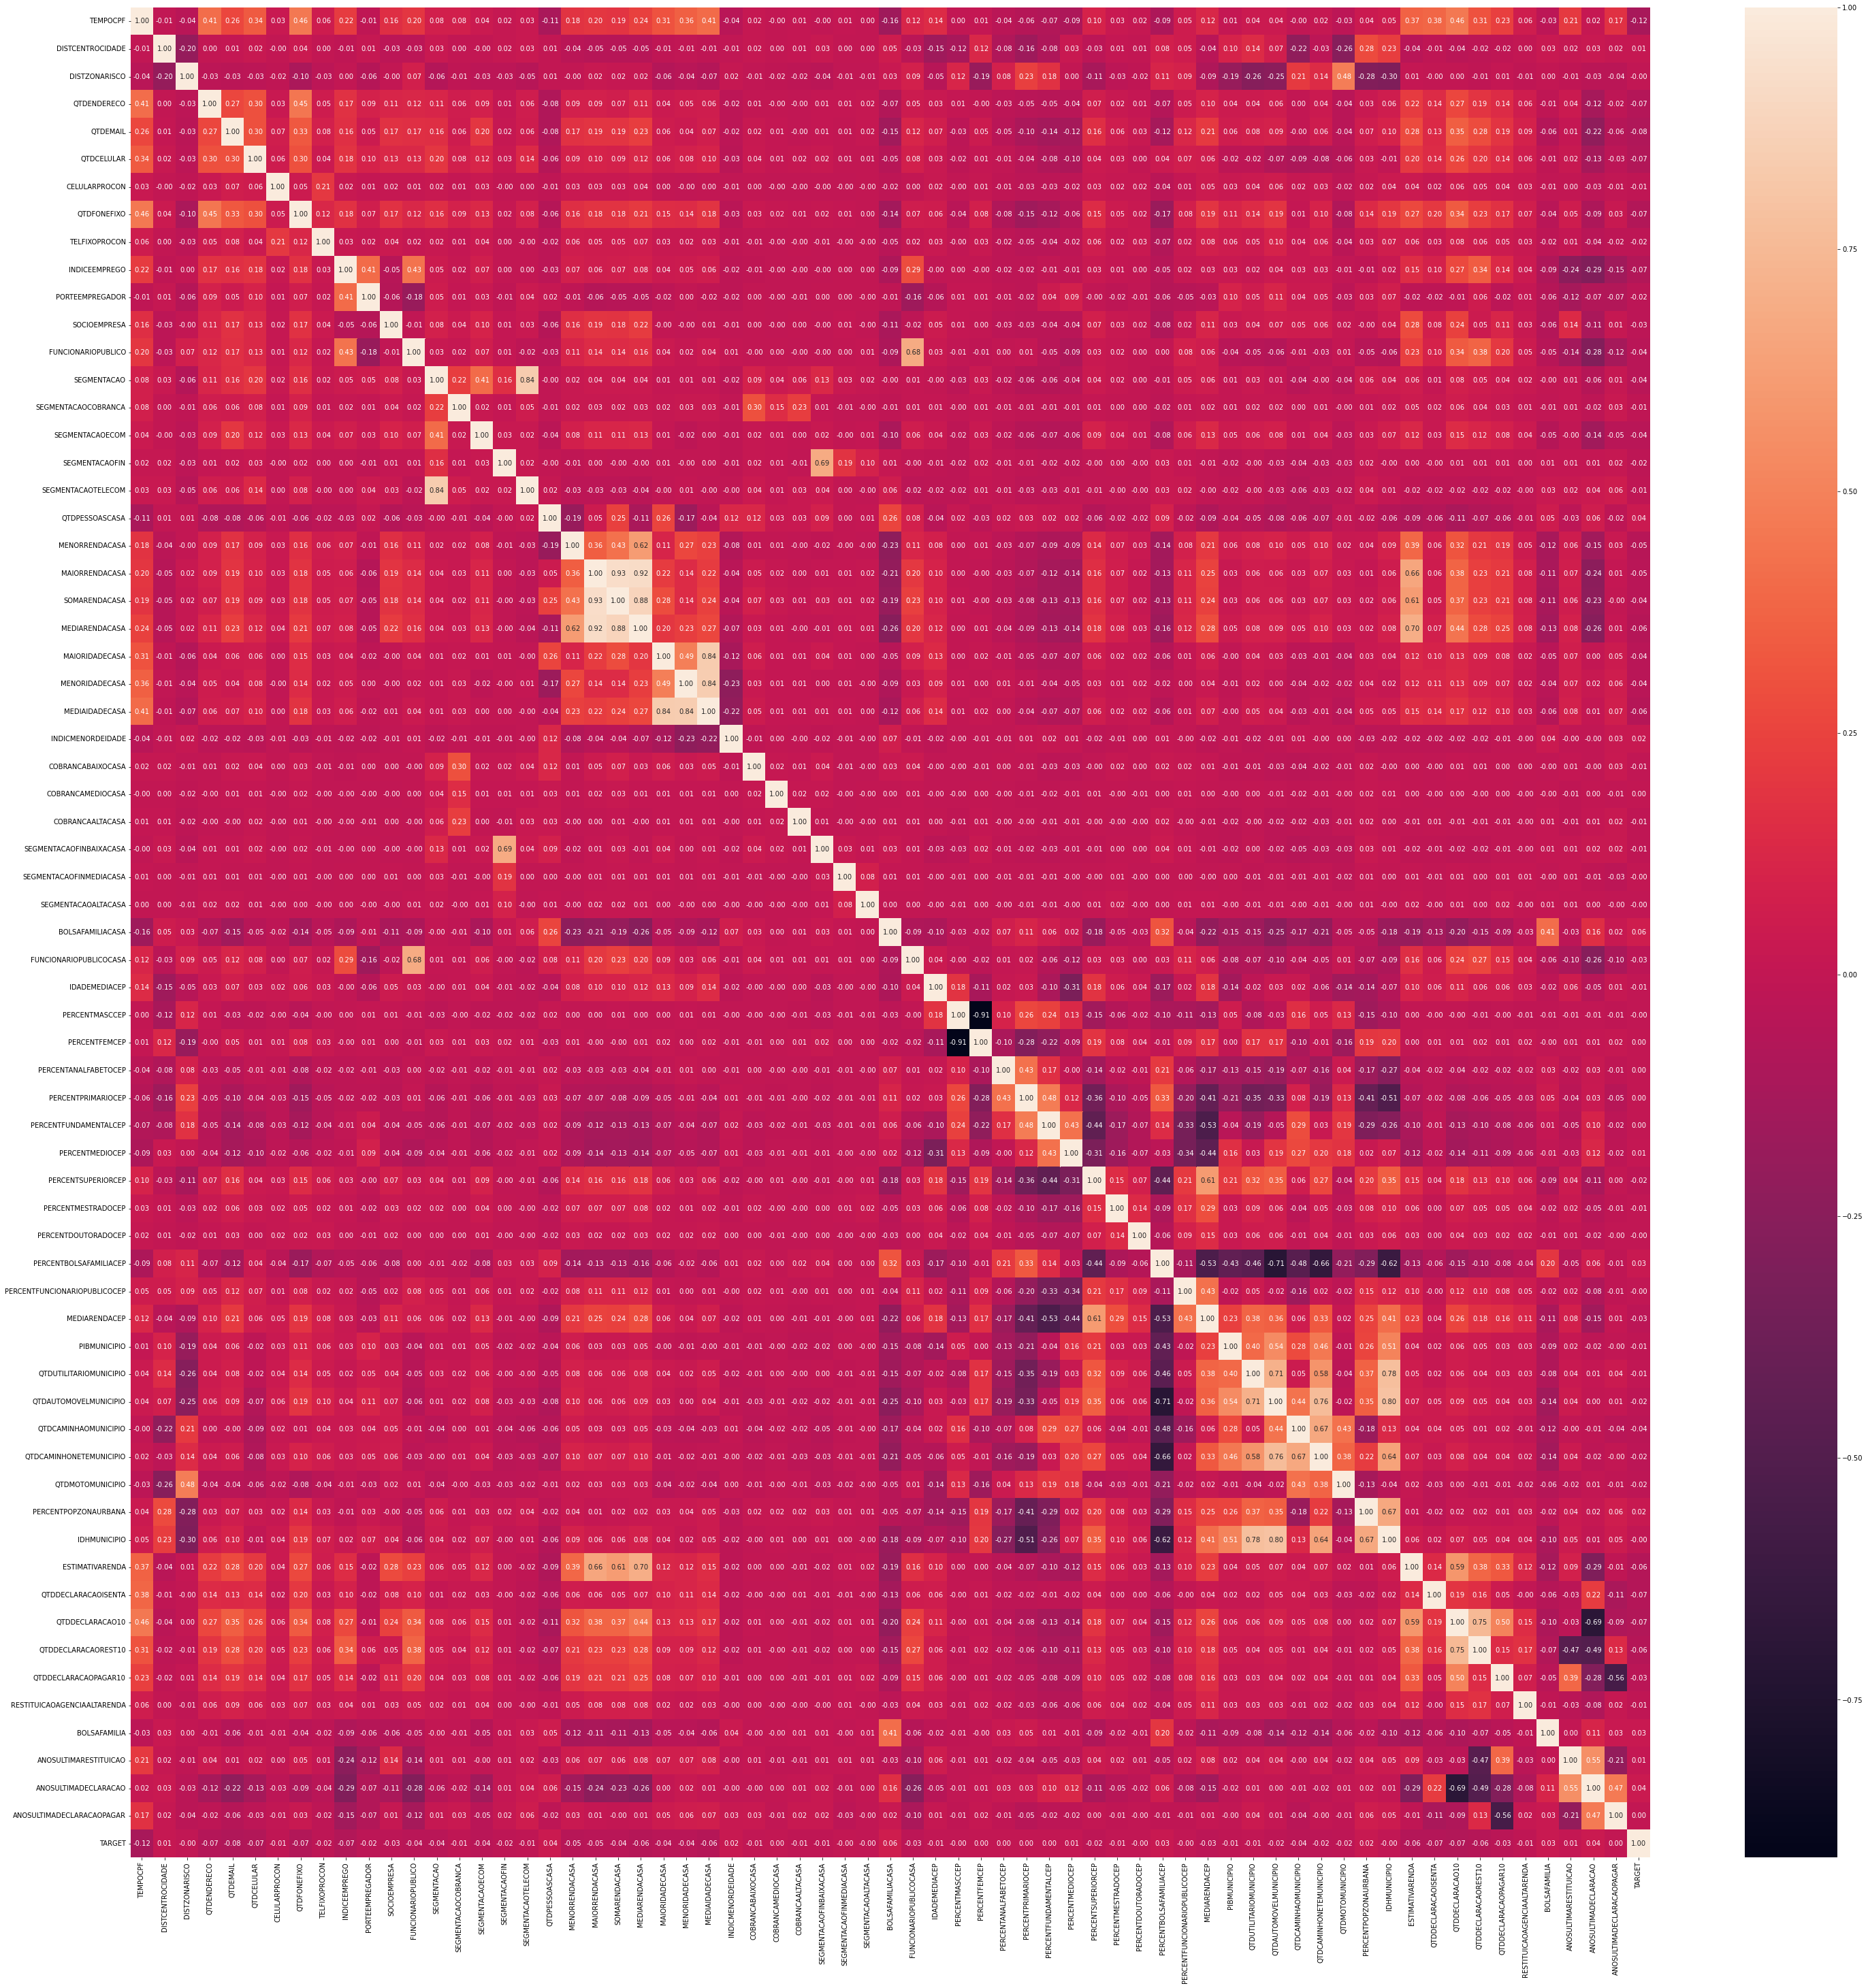

In [104]:
correlacao = train.corr()
fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(correlacao, annot=True, fmt='.2f')
plt.show()

# Análise Univalorada

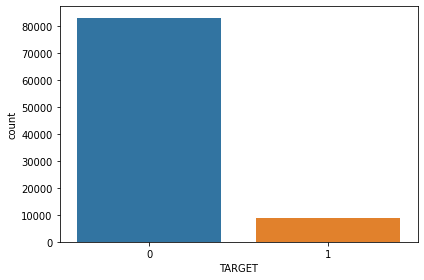

In [105]:
# gráfico de contagem do target no treino
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="TARGET", data=train)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(30.0, 0.0)

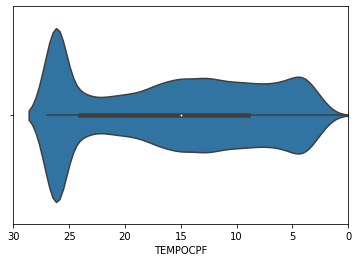

In [106]:
sns.violinplot(train["TEMPOCPF"])
plt.xlim(30,0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


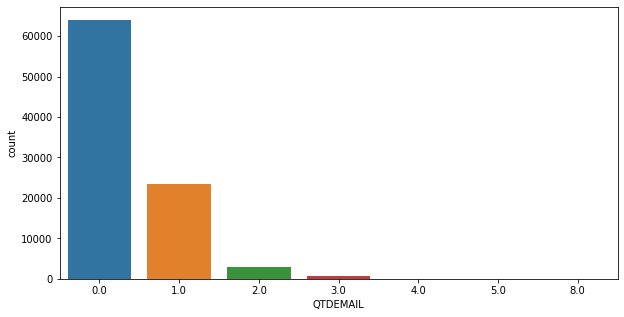

In [107]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train['QTDEMAIL'], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


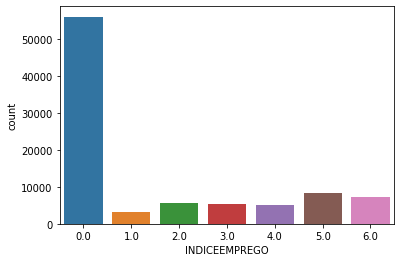

In [108]:
sns.countplot(train["INDICEEMPREGO"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


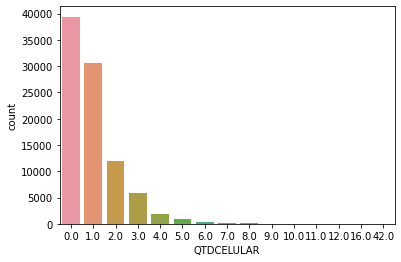

In [109]:
sns.countplot(train["QTDCELULAR"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


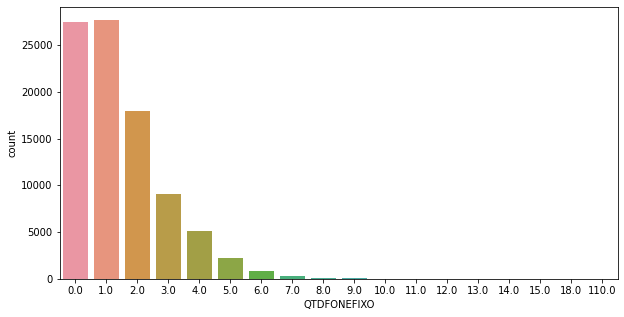

In [110]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train["QTDFONEFIXO"], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


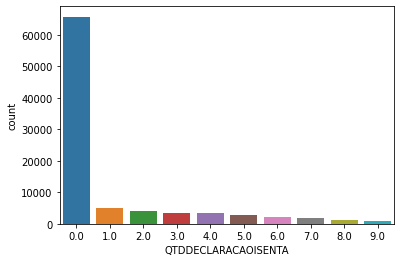

In [111]:
sns.countplot(train["QTDDECLARACAOISENTA"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


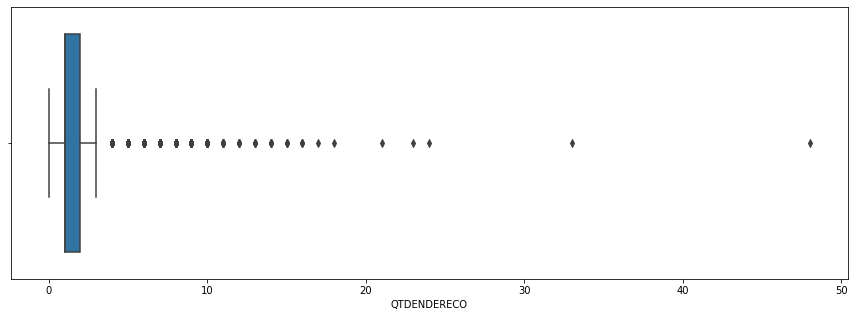

In [112]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(train["QTDENDERECO"], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


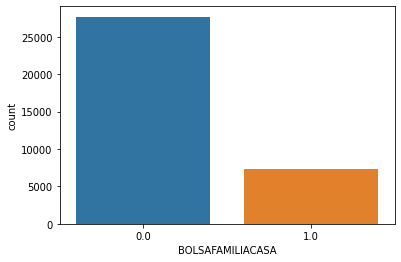

In [113]:
sns.countplot(train["BOLSAFAMILIACASA"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

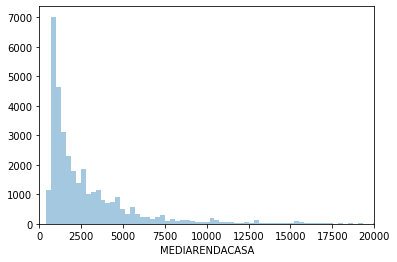

In [114]:
sns.distplot(train["MEDIARENDACASA"], kde=False, bins= 100)
plt.xlim(0,20000)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


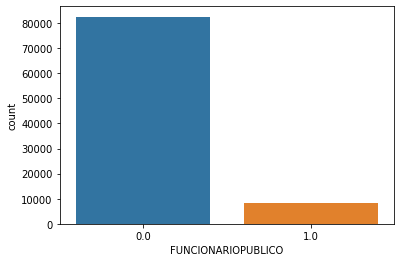

In [115]:
sns.countplot(train["FUNCIONARIOPUBLICO"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


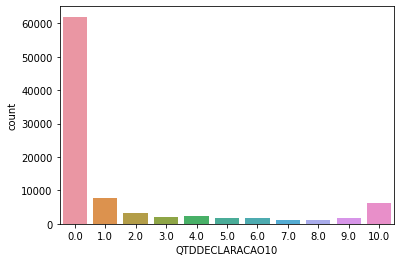

In [116]:
sns.countplot(train["QTDDECLARACAO10"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


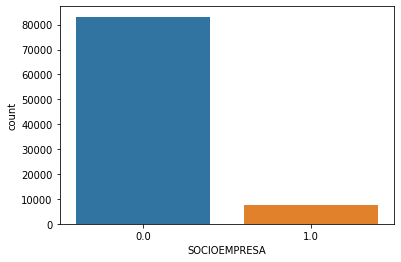

In [117]:
sns.countplot(train["SOCIOEMPRESA"])
plt.show()

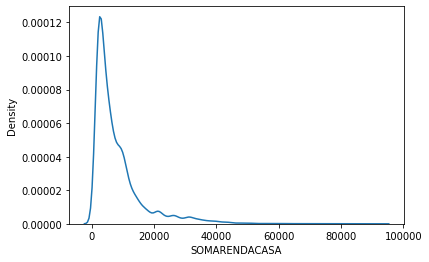

In [118]:
sns.kdeplot(train['SOMARENDACASA'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


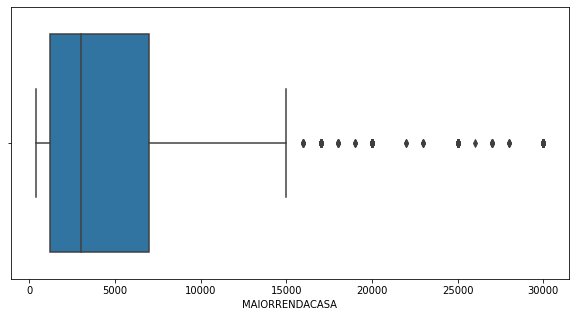

In [119]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(train['MAIORRENDACASA'], ax=ax)
plt.show()

# Análise Multivalorado

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


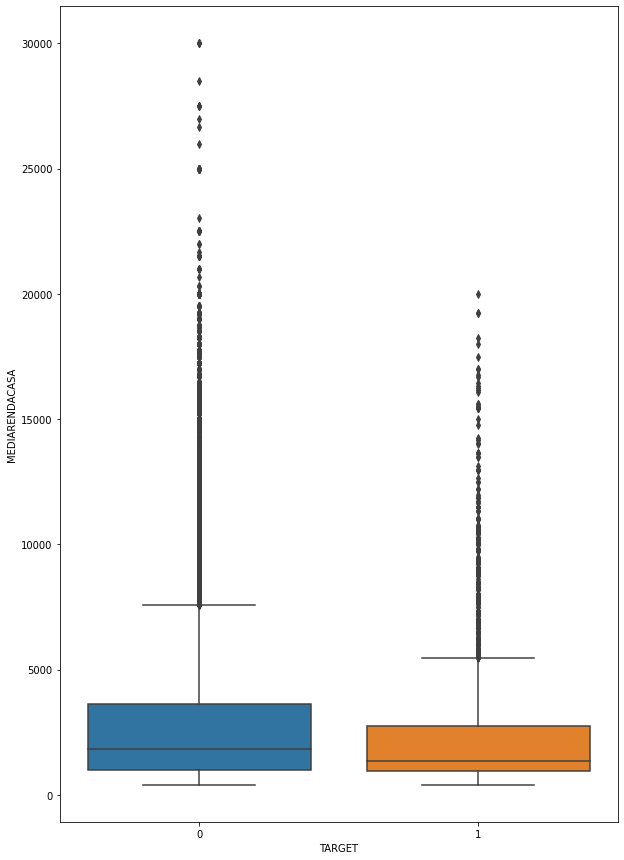

In [120]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.boxplot(train['TARGET'], train['MEDIARENDACASA'], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


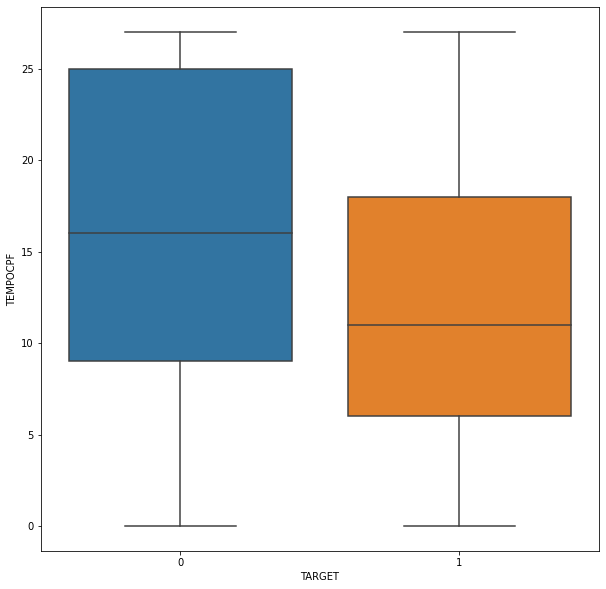

In [121]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(train['TARGET'], train['TEMPOCPF'], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


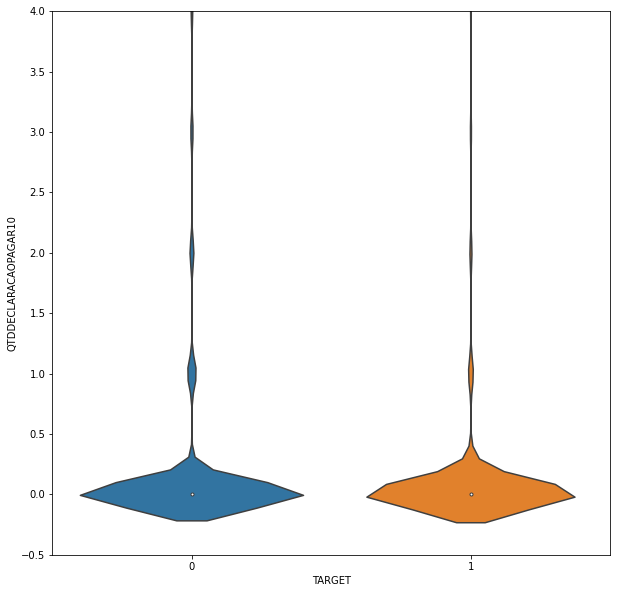

In [139]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(train['TARGET'], train['QTDDECLARACAOPAGAR10'], ax=ax)
plt.ylim(-0.5,4)
plt.show()

# Removendo colunas onde a correlação com o TARGET é menor que 1

In [122]:
infoColumns = pd.read_csv('infoColumns.csv')

In [123]:
infoColumns.head(5)

,names,min,max,%null,correlation
0,TARGET,0.0,1.0,0.000000,100.00
1,TEMPOCPF,0.0,27.0,0.031833,12.02
2,QTDEMAIL,0.0,8.0,0.013235,7.75
3,QTDDECLARACAO10,0.0,10.0,0.013235,7.47
4,INDICEEMPREGO,0.0,6.0,0.013235,7.47


In [124]:
for index, row in infoColumns.iterrows():
    try:
        if row['correlation'] < 1:
                train.drop(row['names'], axis=1, inplace=True)
    except: 
        continue

train.head(5)

,TEMPOCPF,DISTCENTROCIDADE,QTDENDERECO,QTDEMAIL,QTDCELULAR,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,PORTEEMPREGADOR,SOCIOEMPRESA,...,QTDMOTOMUNICIPIO,PERCENTPOPZONAURBANA,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,BOLSAFAMILIA,ANOSULTIMADECLARACAO,TARGET
0,11.0,3338.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,323.0,96.0,900.0,0.0,0.0,0.0,0.0,0.0,NaN,1
1,19.0,5792.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,200.0,91.0,400.0,0.0,0.0,0.0,0.0,1.0,NaN,0
2,26.0,1550.0,1.0,0.0,2.0,1.0,0.0,4.0,2.0,0.0,...,254.0,90.0,2400.0,4.0,2.0,0.0,0.0,0.0,4.0,0
3,18.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,254.0,94.0,25000.0,1.0,7.0,0.0,1.0,0.0,2.0,0
4,20.0,0.0,3.0,0.0,1.0,3.0,0.0,6.0,0.0,0.0,...,147.0,95.0,1900.0,0.0,0.0,0.0,0.0,0.0,15.0,0


# Removendo colunas com mais de 50% de valores Nulos

In [125]:
for index, row in infoColumns.iterrows():
    try:
        if row['%null'] > 0.50:
                train.drop(row['names'], axis=1, inplace=True)
    except: 
        continue

train.head(5)

,TEMPOCPF,DISTCENTROCIDADE,QTDENDERECO,QTDEMAIL,QTDCELULAR,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,PORTEEMPREGADOR,SOCIOEMPRESA,...,QTDCAMINHONETEMUNICIPIO,QTDMOTOMUNICIPIO,PERCENTPOPZONAURBANA,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,BOLSAFAMILIA,TARGET
0,11.0,3338.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,81.0,323.0,96.0,900.0,0.0,0.0,0.0,0.0,0.0,1
1,19.0,5792.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,52.0,200.0,91.0,400.0,0.0,0.0,0.0,0.0,1.0,0
2,26.0,1550.0,1.0,0.0,2.0,1.0,0.0,4.0,2.0,0.0,...,81.0,254.0,90.0,2400.0,4.0,2.0,0.0,0.0,0.0,0
3,18.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,72.0,254.0,94.0,25000.0,1.0,7.0,0.0,1.0,0.0,0
4,20.0,0.0,3.0,0.0,1.0,3.0,0.0,6.0,0.0,0.0,...,49.0,147.0,95.0,1900.0,0.0,0.0,0.0,0.0,0.0,0


# Variable Inflation Factor (VIF)

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Correlation"] = [abs(round(X[i].corr(X["TARGET"])*100,2)) for i in X.columns]

    return vif

In [127]:
train = train.fillna(train.mean())

In [129]:
while True:
    dataframe_vif = calc_vif(train).sort_values('VIF', ascending=False)
    row = dataframe_vif.iloc[0]
    if row['VIF'] > 5.0:
        train.drop(row['variables'], axis=1, inplace=True)
    else: 
        break
    

In [131]:
calc_vif(train).sort_values('Correlation', ascending=False)

,variables,VIF,Correlation
22,TARGET,1.111747,100.00
2,QTDEMAIL,1.780675,7.60
6,INDICEEMPREGO,2.758872,7.33
3,QTDCELULAR,2.105045,7.26
4,QTDFONEFIXO,2.846639,6.86
18,QTDDECLARACAOISENTA,1.347108,6.69
1,QTDENDERECO,2.902050,6.49
17,ESTIMATIVARENDA,2.147656,6.36
19,QTDDECLARACAOREST10,1.608008,5.79
11,SEGMENTACAOECOM,1.297106,4.27
